In [132]:
import kagglehub

# Download the dataset to the current directory
path = kagglehub.dataset_download("mohitsinghrajput1307/practice-dataset1")
print(f"Dataset downloaded to: {path}")


Dataset downloaded to: C:\Users\User\.cache\kagglehub\datasets\mohitsinghrajput1307\practice-dataset1\versions\1


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("./Datasets/didPurchase.csv")
data.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,47,48000,No
2,Germany,35,54000,No
3,Spain,38,61000,No
4,Spain,41,81000,Yes


In [134]:
data = data.dropna()
data.head()

,Country,Age,Salary,Purchased
0,France,44,72000,No
1,Spain,47,48000,No
2,Germany,35,54000,No
3,Spain,38,61000,No
4,Spain,41,81000,Yes


In [135]:
# changes ages from numeric to categorical
ages = ["0-17", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
age_number = [17 , 24 , 34 , 44 , 54 , 64]

def categorize_age(age):
    for i in range(len(age_number)):
        if age <= age_number[i]:
            return ages[i]
    return ages[-1]

data['Age'] = data['Age'].apply(categorize_age)
data.head()


salary = ["high", "medium", "low"]
salary_number = [ data['Salary'].mean()-data['Salary'].std(),
                  data['Salary'].mean(),
                  data['Salary'].mean()+data['Salary'].std() ]

print(salary_number)

def categorize_salary(sal):
    if sal >= salary_number[2]:
        return salary[0]
    elif sal >= salary_number[1]:
        return salary[1]
    else:
        return salary[2]
data['Salary'] = data['Salary'].apply(categorize_salary)
data.head()


[np.float64(46229.43097433617), np.float64(63750.0), np.float64(81270.56902566383)]


,Country,Age,Salary,Purchased
0,France,35-44,medium,No
1,Spain,45-54,low,No
2,Germany,35-44,low,No
3,Spain,35-44,low,No
4,Spain,35-44,medium,Yes


In [136]:
purchase_percentage = data[data['Purchased'] == 'Yes'].shape[0] / data.shape[0] * 100
print(f"Percentage of users who made a purchase: {purchase_percentage:.2f}%")

print("salary low:", data[data['Salary'] == 'low'].shape[0])
print("salary medium:", data[data['Salary'] == 'medium'].shape[0])
print("salary high:", data[data['Salary'] == 'high'].shape[0] , '\n')

print("age 0-17:", data[data['Age'] == '0-17'].shape[0])
print("age 18-24:", data[data['Age'] == '18-24'].shape[0])
print("age 25-34:", data[data['Age'] == '25-34'].shape[0])
print("age 35-44:", data[data['Age'] == '35-44'].shape[0])
print("age 45-54:", data[data['Age'] == '45-54'].shape[0])
print("age 55-64:", data[data['Age'] == '55-64'].shape[0])
print("age 65+:", data[data['Age'] == '65+'].shape[0])

Percentage of users who made a purchase: 51.67%
salary low: 31
salary medium: 18
salary high: 11 

age 0-17: 0
age 18-24: 4
age 25-34: 26
age 35-44: 22
age 45-54: 8
age 55-64: 0
age 65+: 0


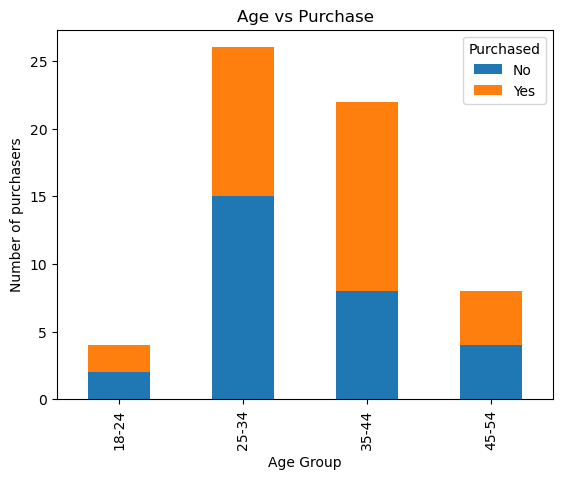

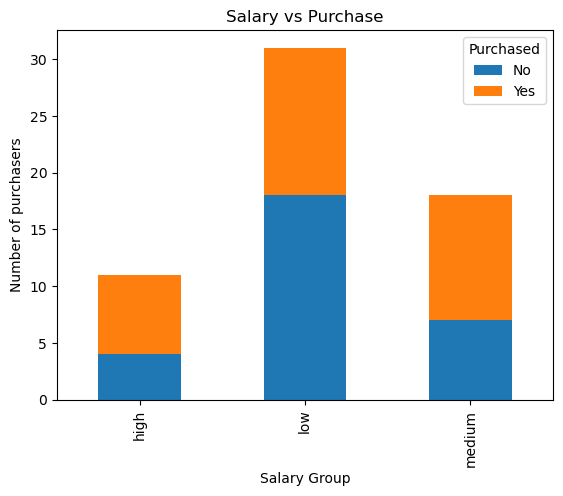

In [137]:
#age vs purchase histogram
data_age_purchase = data.groupby(['Age', 'Purchased']).size().unstack()
data_age_purchase.plot(kind='bar', stacked=True) 
plt.title('Age vs Purchase')
plt.xlabel('Age Group')
plt.ylabel('Number of purchasers')
plt.show()

#salary vs purchase histogram
data_salary_purchase = data.groupby(['Salary', 'Purchased']).size().unstack()
data_salary_purchase.plot(kind='bar', stacked=True)
plt.title('Salary vs Purchase')
plt.xlabel('Salary Group')
plt.ylabel('Number of purchasers')
plt.show()


In [138]:
x = data.values[:, 0:3]
y = data.values[:, 3]

# x has categorical data as strings, convert them to integers
from sklearn.preprocessing import LabelEncoder

column_names = ['Country', 'Age', 'Salary']
encoders = []

for i in range(x.shape[1]):
    le = LabelEncoder()
    x[:, i] = le.fit_transform(x[:, i])
    encoders.append(le)
    print(f"\n{column_names[i]} encoding:")
    for idx, category in enumerate(le.classes_):
        print(f"  {idx} = {category}")

x = x.astype(int)



Country encoding:
  0 = Egypt
  1 = France
  2 = Germany
  3 = Japan
  4 = Spain

Age encoding:
  0 = 18-24
  1 = 25-34
  2 = 35-44
  3 = 45-54

Salary encoding:
  0 = high
  1 = low
  2 = medium


In [139]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x, y)

KNeighborsClassifier()

In [140]:
x_new = np.array([[encoders[0].transform(['France'])[0], encoders[1].transform(['25-34'])[0], encoders[2].transform(['medium'])[0]],
                  [encoders[0].transform(['Spain'])[0], encoders[1].transform(['18-24'])[0], encoders[2].transform(['low'])[0]],
                  [encoders[0].transform(['Egypt'])[0], encoders[1].transform(['45-54'])[0], encoders[2].transform(['low'])[0]],
                  [encoders[0].transform(['Japan'])[0], encoders[1].transform(['25-34'])[0], encoders[2].transform(['high'])[0]],
                  [encoders[0].transform(['Germany'])[0], encoders[1].transform(['35-44'])[0], encoders[2].transform(['high'])[0]],
                  [encoders[0].transform(['France'])[0], encoders[1].transform(['18-24'])[0], encoders[2].transform(['low'])[0]],
                  [encoders[0].transform(['Japan'])[0], encoders[1].transform(['45-54'])[0], encoders[2].transform(['high'])[0]],
                  [encoders[0].transform(['Spain'])[0], encoders[1].transform(['35-44'])[0], encoders[2].transform(['medium'])[0]],
                  [encoders[0].transform(['Egypt'])[0], encoders[1].transform(['25-34'])[0], encoders[2].transform(['low'])[0]]
                 ])
predictions = knn.predict(x_new)
results = pd.DataFrame({'Input': ['France,   25-34, medium', 'Spain,   18-24, low', 'Egypt,   45-54, low', 'Japan,   25-34, high',
                          'Germany,   35-44, high', 'France,   18-24, low', 'Japan,   45-54, high', 'Spain,   35-44, medium', 'Egypt,   25-34, low'],
                        'Prediction': predictions})
results


,Input,Prediction
0,"France, 25-34, medium",Yes
1,"Spain, 18-24, low",Yes
2,"Egypt, 45-54, low",Yes
3,"Japan, 25-34, high",Yes
4,"Germany, 35-44, high",No
5,"France, 18-24, low",No
6,"Japan, 45-54, high",No
7,"Spain, 35-44, medium",No
8,"Egypt, 25-34, low",No


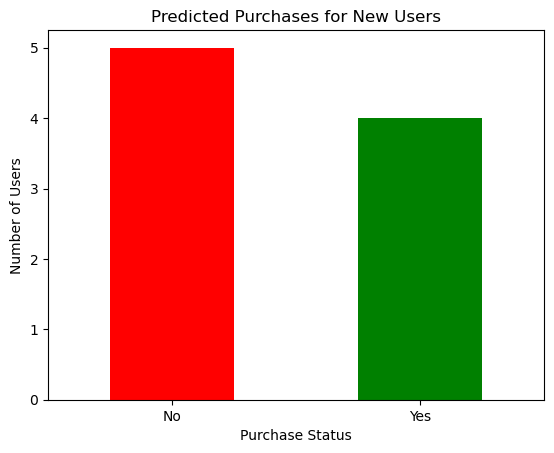

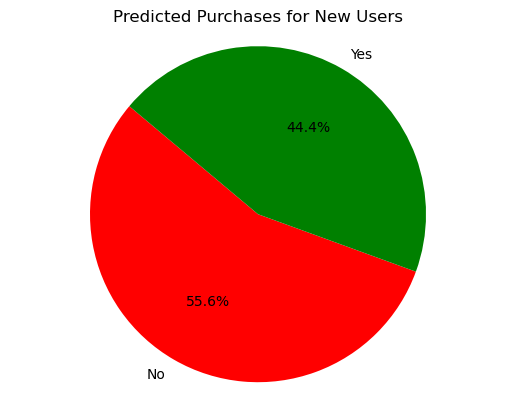

In [144]:
# plot for results
purchase_counts = results['Prediction'].value_counts()
purchase_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Predicted Purchases for New Users')
plt.xlabel('Purchase Status')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


#another way to plot results
labels = purchase_counts.index
sizes = purchase_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Predicted Purchases for New Users')
plt.axis('equal')
plt.show()